# GROUP: 10

**Task:** *Predict the number of comments a post will receive in H hours. Identify the
features that contribute most to the number of comments.*

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/kaggle/input/facebook-comments-volume-dataset/Dataset/Training/Features_Variant_3.csv'  
df = pd.read_csv(file_path)

In [134]:
df.head()

,634995,0,463,1,0.0,1280.0,14.807017543859649,1.0,110.92703624139808,0.0.1,...,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,1.2,0.19
0,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,1,0,0,0,0,0,0,0
3,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,1,0,0,0,0
4,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,1,0,0,0,0,0


In [135]:
column_names = [
    'Page Likes',
    'Page Checkins',
    'Page Talking',
    'Page Category',
    'Derived 1',
    'Derived 2',
    'Derived 3',
    'Derived 4',
    'Derived 5',
    'Derived 6',
    'Derived 7',
    'Derived 8',
    'Derived 9',
    'Derived 10',
    'Derived 11',
    'Derived 12',
    'Derived 13',
    'Derived 14',
    'Derived 15',
    'Derived 16',
    'Derived 17',
    'Derived 18',
    'Derived 19',
    'Derived 20',
    'Derived 21',
    'Derived 22',
    'Derived 23',
    'Derived 24',
    'Derived 25',
    'CC1',
    'CC2',
    'CC3',
    'CC4',
    'CC5',
    'Base Time',
    'Post Length',
    'Post Shares',
    'Post Promo',
    'H Local',
    'Post Weekday Sun',
    'Post Weekday Mon',
    'Post Weekday Tue',
    'Post Weekday Wed',
    'Post Weekday Thu',
    'Post Weekday Fri',
    'Post Weekday Sat',
    'Base Weekday Sun',
    'Base Weekday Mon',
    'Base Weekday Tue',
    'Base Weekday Wed',
    'Base Weekday Thu',
    'Base Weekday Fri',
    'Base Weekday Sat',
    'Target'
]

df = pd.read_csv(file_path, names=column_names)


In [136]:
# Display the first few rows of the dataset to verify
print("First few rows of the dataset with added column names:")
df.head()

First few rows of the dataset with added column names:


,Page Likes,Page Checkins,Page Talking,Page Category,Derived 1,Derived 2,Derived 3,Derived 4,Derived 5,Derived 6,...,Post Weekday Fri,Post Weekday Sat,Base Weekday Sun,Base Weekday Mon,Base Weekday Tue,Base Weekday Wed,Base Weekday Thu,Base Weekday Fri,Base Weekday Sat,Target
0,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,1,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,1,0,0,0,0


### Understanding 'H Local' and 'Target Variable'

#### H Local (Feature No. 39):

Description: This feature is described as "Decimal (0-23) Encoding". It represents the number of hours (from 0 to 23) for which the target variable (comments received) is calculated or measured.
Example: If 'H Local' is 5, it means we are interested in the comments received in the next 5 hours after a certain event or time point.

#### Target Variable (Feature No. 54):

Description: This feature is a decimal number that represents the actual target or outcome we want to predict or analyze. Specifically, it denotes the number of comments received in the next 'H' hours (where 'H' is determined by 'H Local').
Example: If 'H Local' is 5, 'Target Variable' might tell us how many comments were received from hour 0 to hour 5 after the event.
Relationship Between 'H Local' and 'Target Variable'
Dependency: 'H Local' determines the time window (in hours) for which we are interested in observing or predicting the number of comments (Target Variable). The value of 'H Local' directly influences the time period over which the comments are counted or predicted.

Example: If 'H Local' is 5, 'Target Variable' will provide the number of comments received in the next 5 hours after a certain event or starting point.

### How They Are Different or Similar
Difference: 'H Local' is a descriptive feature that specifies the time duration (in hours) for which we want to observe or predict comments. It's more about defining the time window.

Target Variable, on the other hand, is the actual numerical target we are interested in predicting or analyzing. It directly reflects the outcome (number of comments) within the specified time window determined by 'H Local'.

Similarity: Both 'H Local' and 'Target Variable' are related to time and comments received. They work together to define and measure the outcome over a specific time period.

### Conclusion
In summary, 'H Local' and 'Target Variable' are closely related in that 'H Local' defines the time duration (in hours) for which we observe or predict comments, while 'Target Variable' quantifies the actual number of comments received within that defined time window. They are complementary in understanding temporal patterns and predicting outcomes based on time-dependent data.

In [137]:
columns_to_view = ['H Local', 'Target']
view_df = df[columns_to_view]


view_df.tail(50)

,H Local,Target
121048,15,31
121049,24,39
121050,24,159
121051,24,9
121052,24,5
121053,24,169
121054,24,19
121055,24,94
121056,24,540
121057,24,25


In [138]:
df.head()

,Page Likes,Page Checkins,Page Talking,Page Category,Derived 1,Derived 2,Derived 3,Derived 4,Derived 5,Derived 6,...,Post Weekday Fri,Post Weekday Sat,Base Weekday Sun,Base Weekday Mon,Base Weekday Tue,Base Weekday Wed,Base Weekday Thu,Base Weekday Fri,Base Weekday Sat,Target
0,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,1,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,1,0,0,0,0


In [139]:
df.describe()

,Page Likes,Page Checkins,Page Talking,Page Category,Derived 1,Derived 2,Derived 3,Derived 4,Derived 5,Derived 6,...,Post Weekday Fri,Post Weekday Sat,Base Weekday Sun,Base Weekday Mon,Base Weekday Tue,Base Weekday Wed,Base Weekday Thu,Base Weekday Fri,Base Weekday Sat,Target
count,1.210980e+05,121098.000000,1.210980e+05,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,...,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000
mean,1.314636e+06,4668.113528,4.476980e+04,24.252184,0.734166,480.270979,55.912715,35.244149,68.265431,0.088854,...,0.146427,0.136922,0.139507,0.134098,0.137682,0.146898,0.155188,0.144618,0.142009,7.103668
std,6.825200e+06,20554.738011,1.110178e+05,19.943566,13.099364,534.266210,86.605466,68.703258,82.870836,3.149702,...,0.353535,0.343767,0.346476,0.340759,0.344567,0.354005,0.362086,0.351717,0.349061,33.468797
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.314050,2.000000,8.024092,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,244.000000,24.173494,12.000000,34.126990,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,772.000000,71.096478,41.000000,103.590595,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1841.000000,2450.000000,2085.000000,2347.000000,730.948969,434.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1816.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121098 entries, 0 to 121097
Data columns (total 54 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Page Likes        121098 non-null  int64  
 1   Page Checkins     121098 non-null  int64  
 2   Page Talking      121098 non-null  int64  
 3   Page Category     121098 non-null  int64  
 4   Derived 1         121098 non-null  float64
 5   Derived 2         121098 non-null  float64
 6   Derived 3         121098 non-null  float64
 7   Derived 4         121098 non-null  float64
 8   Derived 5         121098 non-null  float64
 9   Derived 6         121098 non-null  float64
 10  Derived 7         121098 non-null  float64
 11  Derived 8         121098 non-null  float64
 12  Derived 9         121098 non-null  float64
 13  Derived 10        121098 non-null  float64
 14  Derived 11        121098 non-null  float64
 15  Derived 12        121098 non-null  float64
 16  Derived 13        12

In [141]:
df.isnull().any().any()

False

In [142]:
df.dtypes

Page Likes            int64
Page Checkins         int64
Page Talking          int64
Page Category         int64
Derived 1           float64
Derived 2           float64
Derived 3           float64
Derived 4           float64
Derived 5           float64
Derived 6           float64
Derived 7           float64
Derived 8           float64
Derived 9           float64
Derived 10          float64
Derived 11          float64
Derived 12          float64
Derived 13          float64
Derived 14          float64
Derived 15          float64
Derived 16          float64
Derived 17          float64
Derived 18          float64
Derived 19          float64
Derived 20          float64
Derived 21          float64
Derived 22          float64
Derived 23          float64
Derived 24          float64
Derived 25          float64
CC1                   int64
CC2                   int64
CC3                   int64
CC4                   int64
CC5                   int64
Base Time             int64
Post Length         

## Feature Reduction

### Removing redundant columns
If there are columns that are highly correlated with each other, we are removing some of them to avoid multicollinearity issues.

In [143]:
# Step 1: Calculate correlation matrix
correlation_matrix = df.corr().abs()

# Step 2: Find columns with correlation above threshold
threshold = 0.9  
high_corr_pairs = np.where(correlation_matrix > threshold)
correlated_columns = [(correlation_matrix.columns[x], correlation_matrix.columns[y])
                      for x, y in zip(*high_corr_pairs) if x != y and x < y]

print("Highly correlated column pairs:")
for pair in correlated_columns:
    print(pair)


Highly correlated column pairs:
('Derived 1', 'Derived 16')
('Derived 2', 'Derived 5')
('Derived 2', 'Derived 7')
('Derived 2', 'Derived 12')
('Derived 2', 'Derived 17')
('Derived 2', 'Derived 20')
('Derived 2', 'Derived 21')
('Derived 2', 'Derived 22')
('Derived 3', 'Derived 4')
('Derived 3', 'Derived 8')
('Derived 3', 'Derived 10')
('Derived 3', 'Derived 13')
('Derived 3', 'Derived 15')
('Derived 3', 'Derived 18')
('Derived 3', 'Derived 19')
('Derived 3', 'Derived 25')
('Derived 4', 'Derived 8')
('Derived 4', 'Derived 13')
('Derived 4', 'Derived 18')
('Derived 4', 'Derived 19')
('Derived 5', 'Derived 10')
('Derived 5', 'Derived 15')
('Derived 5', 'Derived 18')
('Derived 5', 'Derived 20')
('Derived 5', 'Derived 25')
('Derived 7', 'Derived 12')
('Derived 7', 'Derived 17')
('Derived 7', 'Derived 21')
('Derived 7', 'Derived 22')
('Derived 8', 'Derived 9')
('Derived 8', 'Derived 10')
('Derived 8', 'Derived 13')
('Derived 8', 'Derived 18')
('Derived 8', 'Derived 19')
('Derived 8', 'Derived

In [144]:
# Step 3: Decide which columns to keep
columns_to_drop = set()
for x, y in correlated_columns:
    if x not in columns_to_drop and y not in columns_to_drop:
        # Determine which column to keep based on higher importance or other criteria
        if 'importance' in df.columns:
            importance_x = df['importance'].loc[x] if x in df['importance'].index else 0
            importance_y = df['importance'].loc[y] if y in df['importance'].index else 0
            column_to_keep = x if importance_x >= importance_y else y
        else:
            # If no importance metric is available, keep the first column by default
            column_to_keep = x
        
        # Add the column to drop to the set
        columns_to_drop.add(y)
        

# Drop the identified columns
dff = df.drop(columns=columns_to_drop)

# Print the remaining columns in the filtered DataFrame
print("Remaining columns after removing redundancy:")
dff.columns

Remaining columns after removing redundancy:


Index(['Page Likes', 'Page Checkins', 'Page Talking', 'Page Category',
       'Derived 1', 'Derived 2', 'Derived 3', 'Derived 6', 'Derived 9',
       'Derived 11', 'Derived 14', 'Derived 23', 'Derived 24', 'CC1', 'CC2',
       'CC3', 'CC5', 'Base Time', 'Post Length', 'Post Shares', 'Post Promo',
       'H Local', 'Post Weekday Sun', 'Post Weekday Mon', 'Post Weekday Tue',
       'Post Weekday Wed', 'Post Weekday Thu', 'Post Weekday Fri',
       'Post Weekday Sat', 'Base Weekday Sun', 'Base Weekday Mon',
       'Base Weekday Tue', 'Base Weekday Wed', 'Base Weekday Thu',
       'Base Weekday Fri', 'Base Weekday Sat', 'Target'],
      dtype='object')

In [145]:
remaining_columns = [
    'Page Likes', 'Page Checkins', 'Page Talking', 'Page Category',
    'Derived 1', 'Derived 2', 'Derived 3', 'Derived 6', 'Derived 9',
    'Derived 11', 'Derived 14', 'Derived 23', 'Derived 24', 'CC1', 'CC2',
    'CC3', 'CC5', 'Base Time', 'Post Length', 'Post Shares', 'Post Promo',
    'H Local', 'Post Weekday Sun', 'Post Weekday Mon', 'Post Weekday Tue',
    'Post Weekday Wed', 'Post Weekday Thu', 'Post Weekday Fri',
    'Post Weekday Sat', 'Base Weekday Sun', 'Base Weekday Mon',
    'Base Weekday Tue', 'Base Weekday Wed', 'Base Weekday Thu',
    'Base Weekday Fri', 'Base Weekday Sat', 'Target'
]

In [146]:
X_columns = remaining_columns[:-1] 
y_column = remaining_columns[-1]  

X = df[X_columns] 
y = df[y_column]  

### Mutual Information

In [147]:
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information between each feature and the target variable
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame to display the mutual information scores
mi_scores = pd.Series(mi_scores, name="MI Score", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Print the top features based on mutual information scores
print("Top features using mutual information:")
mi_scores


Top features using mutual information:


CC2                 0.438403
CC5                 0.382375
Derived 3           0.198021
CC1                 0.196473
Derived 23          0.180695
Derived 2           0.180643
Page Talking        0.177911
Derived 9           0.176601
Page Likes          0.169317
CC3                 0.152750
Derived 14          0.144284
Derived 24          0.138671
Post Shares         0.134321
Base Time           0.129212
Page Category       0.075000
Page Checkins       0.054420
Post Length         0.015069
Derived 1           0.014996
Derived 6           0.013883
Base Weekday Thu    0.003914
Post Weekday Tue    0.002822
Post Weekday Wed    0.002499
H Local             0.002377
Base Weekday Sun    0.002051
Base Weekday Sat    0.001397
Post Weekday Sun    0.001091
Post Promo          0.000499
Base Weekday Tue    0.000025
Base Weekday Fri    0.000000
Base Weekday Wed    0.000000
Derived 11          0.000000
Base Weekday Mon    0.000000
Post Weekday Sat    0.000000
Post Weekday Fri    0.000000
Post Weekday M

### Correlation Analysis

In [148]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Selecting the top correlated features with the target variable
target_corr = abs(corr_matrix['Target']).sort_values(ascending=False)

# Print the top correlated features
print("Top correlated features using correlation analysis:")
target_corr


Top correlated features using correlation analysis:


Target              1.000000
CC2                 0.549549
CC5                 0.382282
Derived 8           0.374416
Derived 3           0.365674
Derived 18          0.363097
Derived 4           0.357209
Derived 19          0.356177
Derived 9           0.354237
Derived 13          0.353012
CC4                 0.345631
Derived 25          0.341828
Derived 10          0.333588
CC1                 0.329624
Derived 15          0.325973
Derived 5           0.318083
Derived 20          0.312110
Derived 14          0.273203
Derived 2           0.243040
Derived 17          0.237192
Derived 7           0.229456
Base Time           0.227808
Derived 22          0.227463
Derived 12          0.220687
Derived 21          0.206581
Derived 23          0.195830
Page Talking        0.195281
Post Shares         0.141587
Derived 16          0.129517
Derived 1           0.129312
Derived 6           0.107674
Derived 24          0.092909
CC3                 0.071528
Page Category       0.069233
Page Likes    

### Recursive Feature Elimination (RFE)

In [149]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

# Number of features to select (adjust as needed)
num_features_to_select = 30

# Perform RFE
rfe = RFE(estimator, n_features_to_select=num_features_to_select)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print(f"Top {num_features_to_select} features selected using RFE:")
selected_features


Top 30 features selected using RFE:


Index(['Page Category', 'Derived 1', 'Derived 3', 'Derived 6', 'Derived 9',
       'Derived 11', 'Derived 14', 'Derived 23', 'Derived 24', 'CC1', 'CC2',
       'CC3', 'CC5', 'Base Time', 'Post Shares', 'H Local', 'Post Weekday Sun',
       'Post Weekday Mon', 'Post Weekday Tue', 'Post Weekday Wed',
       'Post Weekday Thu', 'Post Weekday Fri', 'Post Weekday Sat',
       'Base Weekday Sun', 'Base Weekday Mon', 'Base Weekday Tue',
       'Base Weekday Wed', 'Base Weekday Thu', 'Base Weekday Fri',
       'Base Weekday Sat'],
      dtype='object')

### Final selection
Based on the domain knowledge of Facebook comments and observation from the tools above, the following columns are likely to be important features for predicting the number of comments a post will receive:

In [150]:
important_columns = [
    'Page Likes', 'Page Talking', 'Page Category',
    'Derived 1', 'Derived 2', 'Derived 3', 'Derived 6', 'Derived 9',
    'Derived 11', 'Derived 14', 'Derived 23', 'Derived 24', 'CC1', 'CC2',
    'CC3', 'CC5', 'Post Length', 'Post Shares',
    'H Local', 'Post Weekday Sun', 'Post Weekday Mon', 'Post Weekday Tue',
    'Post Weekday Wed', 'Post Weekday Thu', 'Post Weekday Fri',
    'Post Weekday Sat', 'Base Weekday Sun', 'Base Weekday Mon',
    'Base Weekday Tue', 'Base Weekday Wed', 'Base Weekday Thu',
    'Base Weekday Fri', 'Base Weekday Sat','Target'
]

In [151]:
df[important_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121098 entries, 0 to 121097
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Page Likes        121098 non-null  int64  
 1   Page Talking      121098 non-null  int64  
 2   Page Category     121098 non-null  int64  
 3   Derived 1         121098 non-null  float64
 4   Derived 2         121098 non-null  float64
 5   Derived 3         121098 non-null  float64
 6   Derived 6         121098 non-null  float64
 7   Derived 9         121098 non-null  float64
 8   Derived 11        121098 non-null  float64
 9   Derived 14        121098 non-null  float64
 10  Derived 23        121098 non-null  float64
 11  Derived 24        121098 non-null  float64
 12  CC1               121098 non-null  int64  
 13  CC2               121098 non-null  int64  
 14  CC3               121098 non-null  int64  
 15  CC5               121098 non-null  int64  
 16  Post Length       12

In [152]:
df[important_columns].describe()

,Page Likes,Page Talking,Page Category,Derived 1,Derived 2,Derived 3,Derived 6,Derived 9,Derived 11,Derived 14,...,Post Weekday Fri,Post Weekday Sat,Base Weekday Sun,Base Weekday Mon,Base Weekday Tue,Base Weekday Wed,Base Weekday Thu,Base Weekday Fri,Base Weekday Sat,Target
count,1.210980e+05,1.210980e+05,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,...,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000
mean,1.314636e+06,4.476980e+04,24.252184,0.734166,480.270979,55.912715,0.088854,7.205982,0.002271,4.910601,...,0.146427,0.136922,0.139507,0.134098,0.137682,0.146898,0.155188,0.144618,0.142009,7.103668
std,6.825200e+06,1.110178e+05,19.943566,13.099364,534.266210,86.605466,3.149702,18.480889,0.353404,15.443522,...,0.353535,0.343767,0.346476,0.340759,0.344567,0.354005,0.362086,0.351717,0.349061,33.468797
min,3.600000e+01,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,6.980000e+02,9.000000,0.000000,49.000000,5.314050,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,7.045000e+03,18.000000,0.000000,244.000000,24.173494,0.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,5.026400e+04,32.000000,0.000000,772.000000,71.096478,0.000000,8.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,6.089942e+06,106.000000,1841.000000,2450.000000,2085.000000,434.000000,532.000000,55.000000,1879.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1816.000000


### Principal Component Analysis (PCA):
PCA is a linear dimensionality reduction technique that identifies the directions (principal components) that maximize the variance in the data.


### Purpose of PCA

1. **Dimensionality Reduction:** PCA reduces the number of variables while retaining as much variance as possible, simplifying the dataset for analysis and modeling.
   
2. **Feature Extraction:** It identifies important patterns and relationships between variables, transforming them into a new set of principal components that capture the underlying structure of the data.

3. **Visualization:** Visualizing PCA helps in understanding how the original features contribute to the variance in the data. Plotting principal components against each other or against a target variable aids in interpreting the dataset's structure and informing feature selection.

In [153]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of principal components to retain (adjust as needed)
num_components = 20

# Apply PCA
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA-transformed data (optional)
df_pca = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(num_components)])

# Print explained variance ratio (optional)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.14600748 0.06800935 0.05740799 0.0558431  0.0552618  0.04396217
 0.03973073 0.03816829 0.03686801 0.03602264 0.0357796  0.03214597
 0.03117079 0.03076029 0.02999608 0.02936992 0.02896118 0.02848488
 0.02695905 0.02541573]


### Reason for Visualizing PCA

1. **Interpretability:** Visualizing PCA results provides insights into the reduced dimensions and helps interpret the importance of original features in explaining the data's variability.
   
2. **Feature Selection:** It assists in identifying key features that influence the dataset's variance, guiding decisions on which variables to include in further analysis or modeling.

3. **Model Understanding:** Understanding PCA enhances comprehension of the dataset's inherent relationships and aids in making informed decisions regarding data preprocessing and model selection.

PCA serves as a fundamental tool for exploratory data analysis, facilitating clearer insights into complex datasets and supporting data-driven decision-making in various analytical and machine learning tasks.

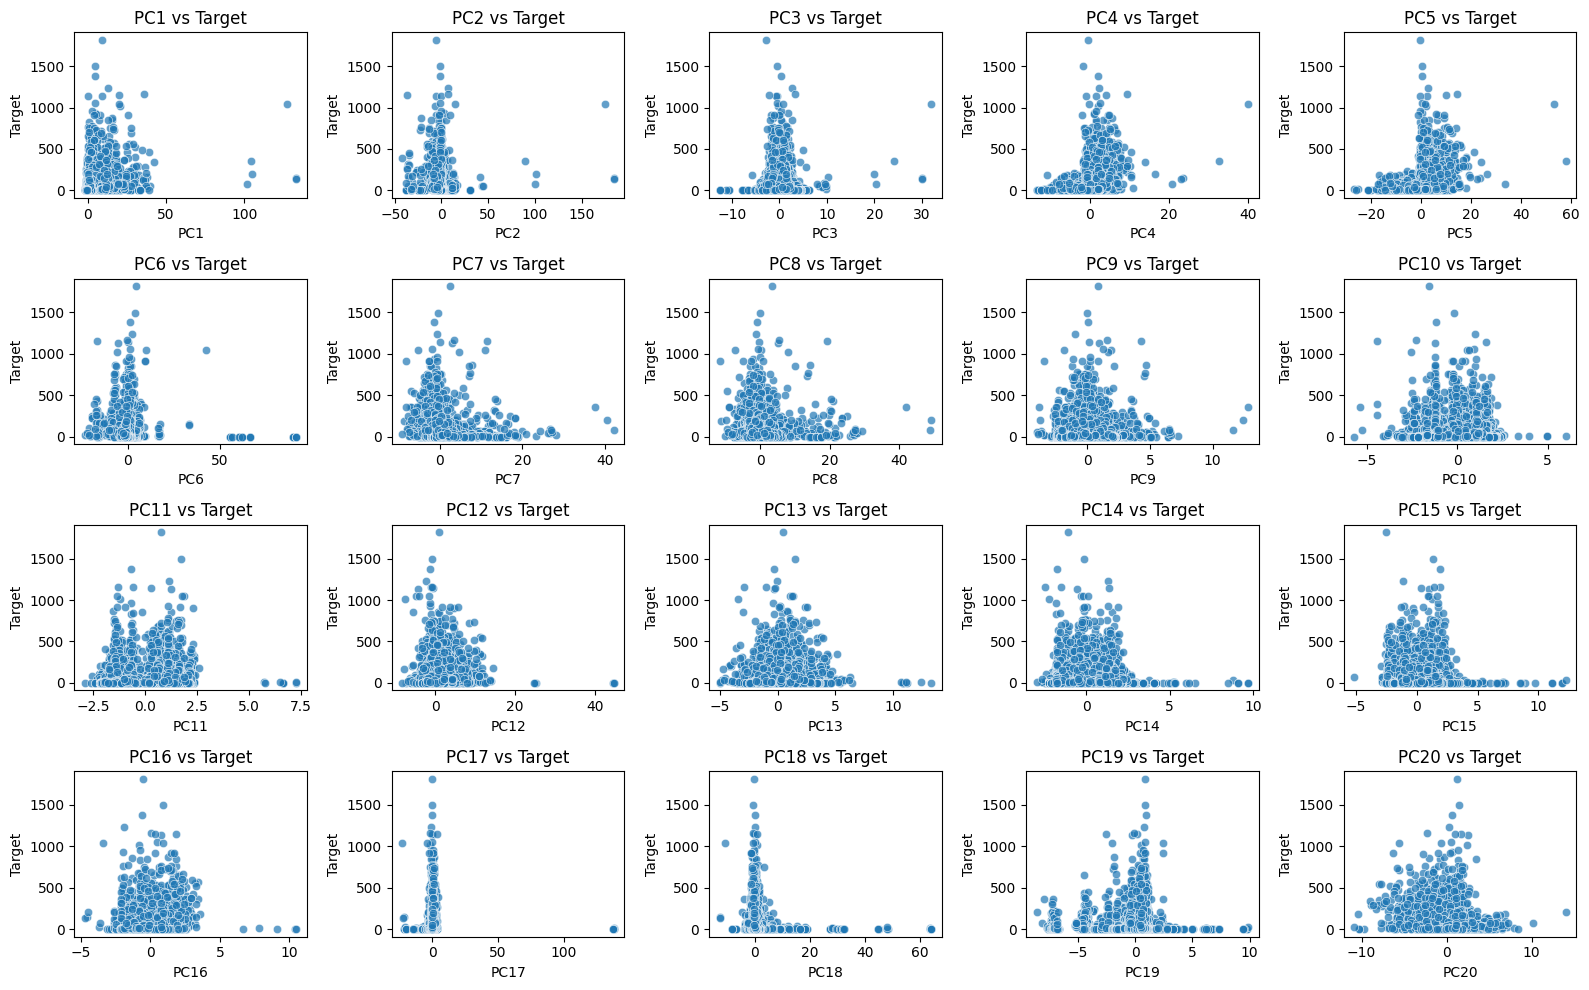

In [154]:
# Add the target variable 'Target' to df_pca
df_pca['Target'] = y

# Plot each principal component against the Target
plt.figure(figsize=(16, 10))
for i in range(num_components):
    plt.subplot(4, 5, i + 1)  # Adjust the layout based on num_components
    sns.scatterplot(x=f'PC{i+1}', y='Target', data=df_pca, alpha=0.7)
    plt.title(f'PC{i+1} vs Target')
    plt.xlabel(f'PC{i+1}')
    plt.ylabel('Target')

plt.tight_layout()
plt.show()

In [155]:
# Assuming pca is your PCA object already fitted with your scaled data
component_loadings = pca.components_

# Create a DataFrame to display the component loadings
component_names = [f"PC{i+1}" for i in range(component_loadings.shape[0])]
components_df = pd.DataFrame(component_loadings, columns=X.columns, index=component_names)

# Print or visualize the component loadings
print("Component Loadings:")
components_df


Component Loadings:


,Page Likes,Page Checkins,Page Talking,Page Category,Derived 1,Derived 2,Derived 3,Derived 6,Derived 9,Derived 11,...,Post Weekday Thu,Post Weekday Fri,Post Weekday Sat,Base Weekday Sun,Base Weekday Mon,Base Weekday Tue,Base Weekday Wed,Base Weekday Thu,Base Weekday Fri,Base Weekday Sat
PC1,0.127735,0.070590,0.266826,-0.112497,0.229469,0.293268,0.400262,0.199912,0.364680,0.018423,...,-0.003831,-0.014644,-0.007699,-0.008421,-0.004222,0.001119,0.006074,0.014882,0.001303,-0.011534
PC2,-0.165605,-0.059769,-0.252856,0.062862,0.370265,-0.142112,-0.057353,0.386981,-0.105799,0.082278,...,0.034146,0.051173,0.039038,0.050595,0.030261,-0.002444,-0.046350,-0.057514,-0.010121,0.039516
PC3,-0.052790,-0.030401,-0.052221,0.036820,0.094050,-0.057227,-0.029715,0.104809,-0.001013,0.013657,...,0.042422,-0.243318,-0.347411,-0.311195,-0.324287,-0.111545,0.178979,0.374032,0.244623,-0.080414
PC4,-0.056710,-0.039480,-0.062170,0.020087,0.101670,-0.050709,-0.008842,0.105250,0.019183,0.008980,...,-0.324520,-0.232041,0.033159,-0.141750,0.126467,0.332224,0.277552,-0.006144,-0.279375,-0.304315
PC5,-0.088825,-0.050196,-0.096137,0.046514,0.159213,-0.070532,0.002372,0.160268,0.064204,0.019328,...,0.159240,0.174127,0.044886,0.133195,-0.022233,-0.155355,-0.164248,-0.053245,0.075693,0.188390
PC6,0.561315,0.104062,0.401576,0.015260,0.014341,-0.005017,-0.104197,0.042489,-0.203243,0.036479,...,0.034986,-0.018622,-0.006348,0.004935,-0.037857,0.003500,0.010004,0.012360,-0.002226,0.007880
PC7,0.138764,-0.114426,0.109367,0.145012,0.209604,-0.153437,-0.045028,0.216547,0.127667,0.043531,...,-0.293714,-0.058510,0.268719,0.036770,0.319548,-0.081976,-0.231721,0.182227,0.015867,-0.237536
PC8,0.155793,-0.176865,0.090822,0.222325,0.236475,-0.199554,-0.036482,0.228106,0.195362,0.029857,...,0.123038,0.170879,-0.186869,0.041518,-0.214120,-0.006541,0.241295,-0.140423,-0.142267,0.218573
PC9,0.034967,-0.047279,0.019193,0.048046,0.058457,-0.046963,-0.015476,0.057364,0.032760,0.000157,...,0.377594,-0.336616,-0.097604,-0.288582,-0.016526,0.421333,-0.273067,-0.216642,0.324832,0.061026
PC10,0.005661,0.004995,0.005593,-0.051263,-0.016741,0.021539,-0.004232,-0.017444,-0.033441,0.023751,...,-0.214309,0.179104,-0.106472,-0.369441,0.189469,-0.048148,-0.048811,0.173690,-0.321367,0.422416


### DATA VISUALISATION

### Plotting Box Plots for Numerical Features

We plotted vertical box plots for each numerical feature in `important_columns` to visually examine the distribution, central tendency, and spread of each feature's values. Here's why this visualization was important:

1. **Purpose:**
   - **Distribution Visualization:** Box plots provided a clear visual representation of the distribution of numerical data, including median, quartiles, and potential outliers.
   - **Comparison Across Features:** By plotting multiple box plots side by side, we could compare the distributions of different features within our dataset.
   - **Identification of Outliers:** Box plots helped us identify outliers, which were data points that significantly differed from other observations.

2. **Importance:**
   - **Data Understanding:** Visualizing the distributions helped us understand the range and variability of each feature's values, which was crucial for data preprocessing and understanding data quality.
   - **Feature Engineering:** Insights gained from box plots will futher guide feature engineering decisions, such as identifying transformations or scaling methods needed to normalize data distributions.
   - **Initial Data Exploration:** Box plots served as a preliminary exploration tool to identify potential issues like skewness or multimodality in feature distributions.

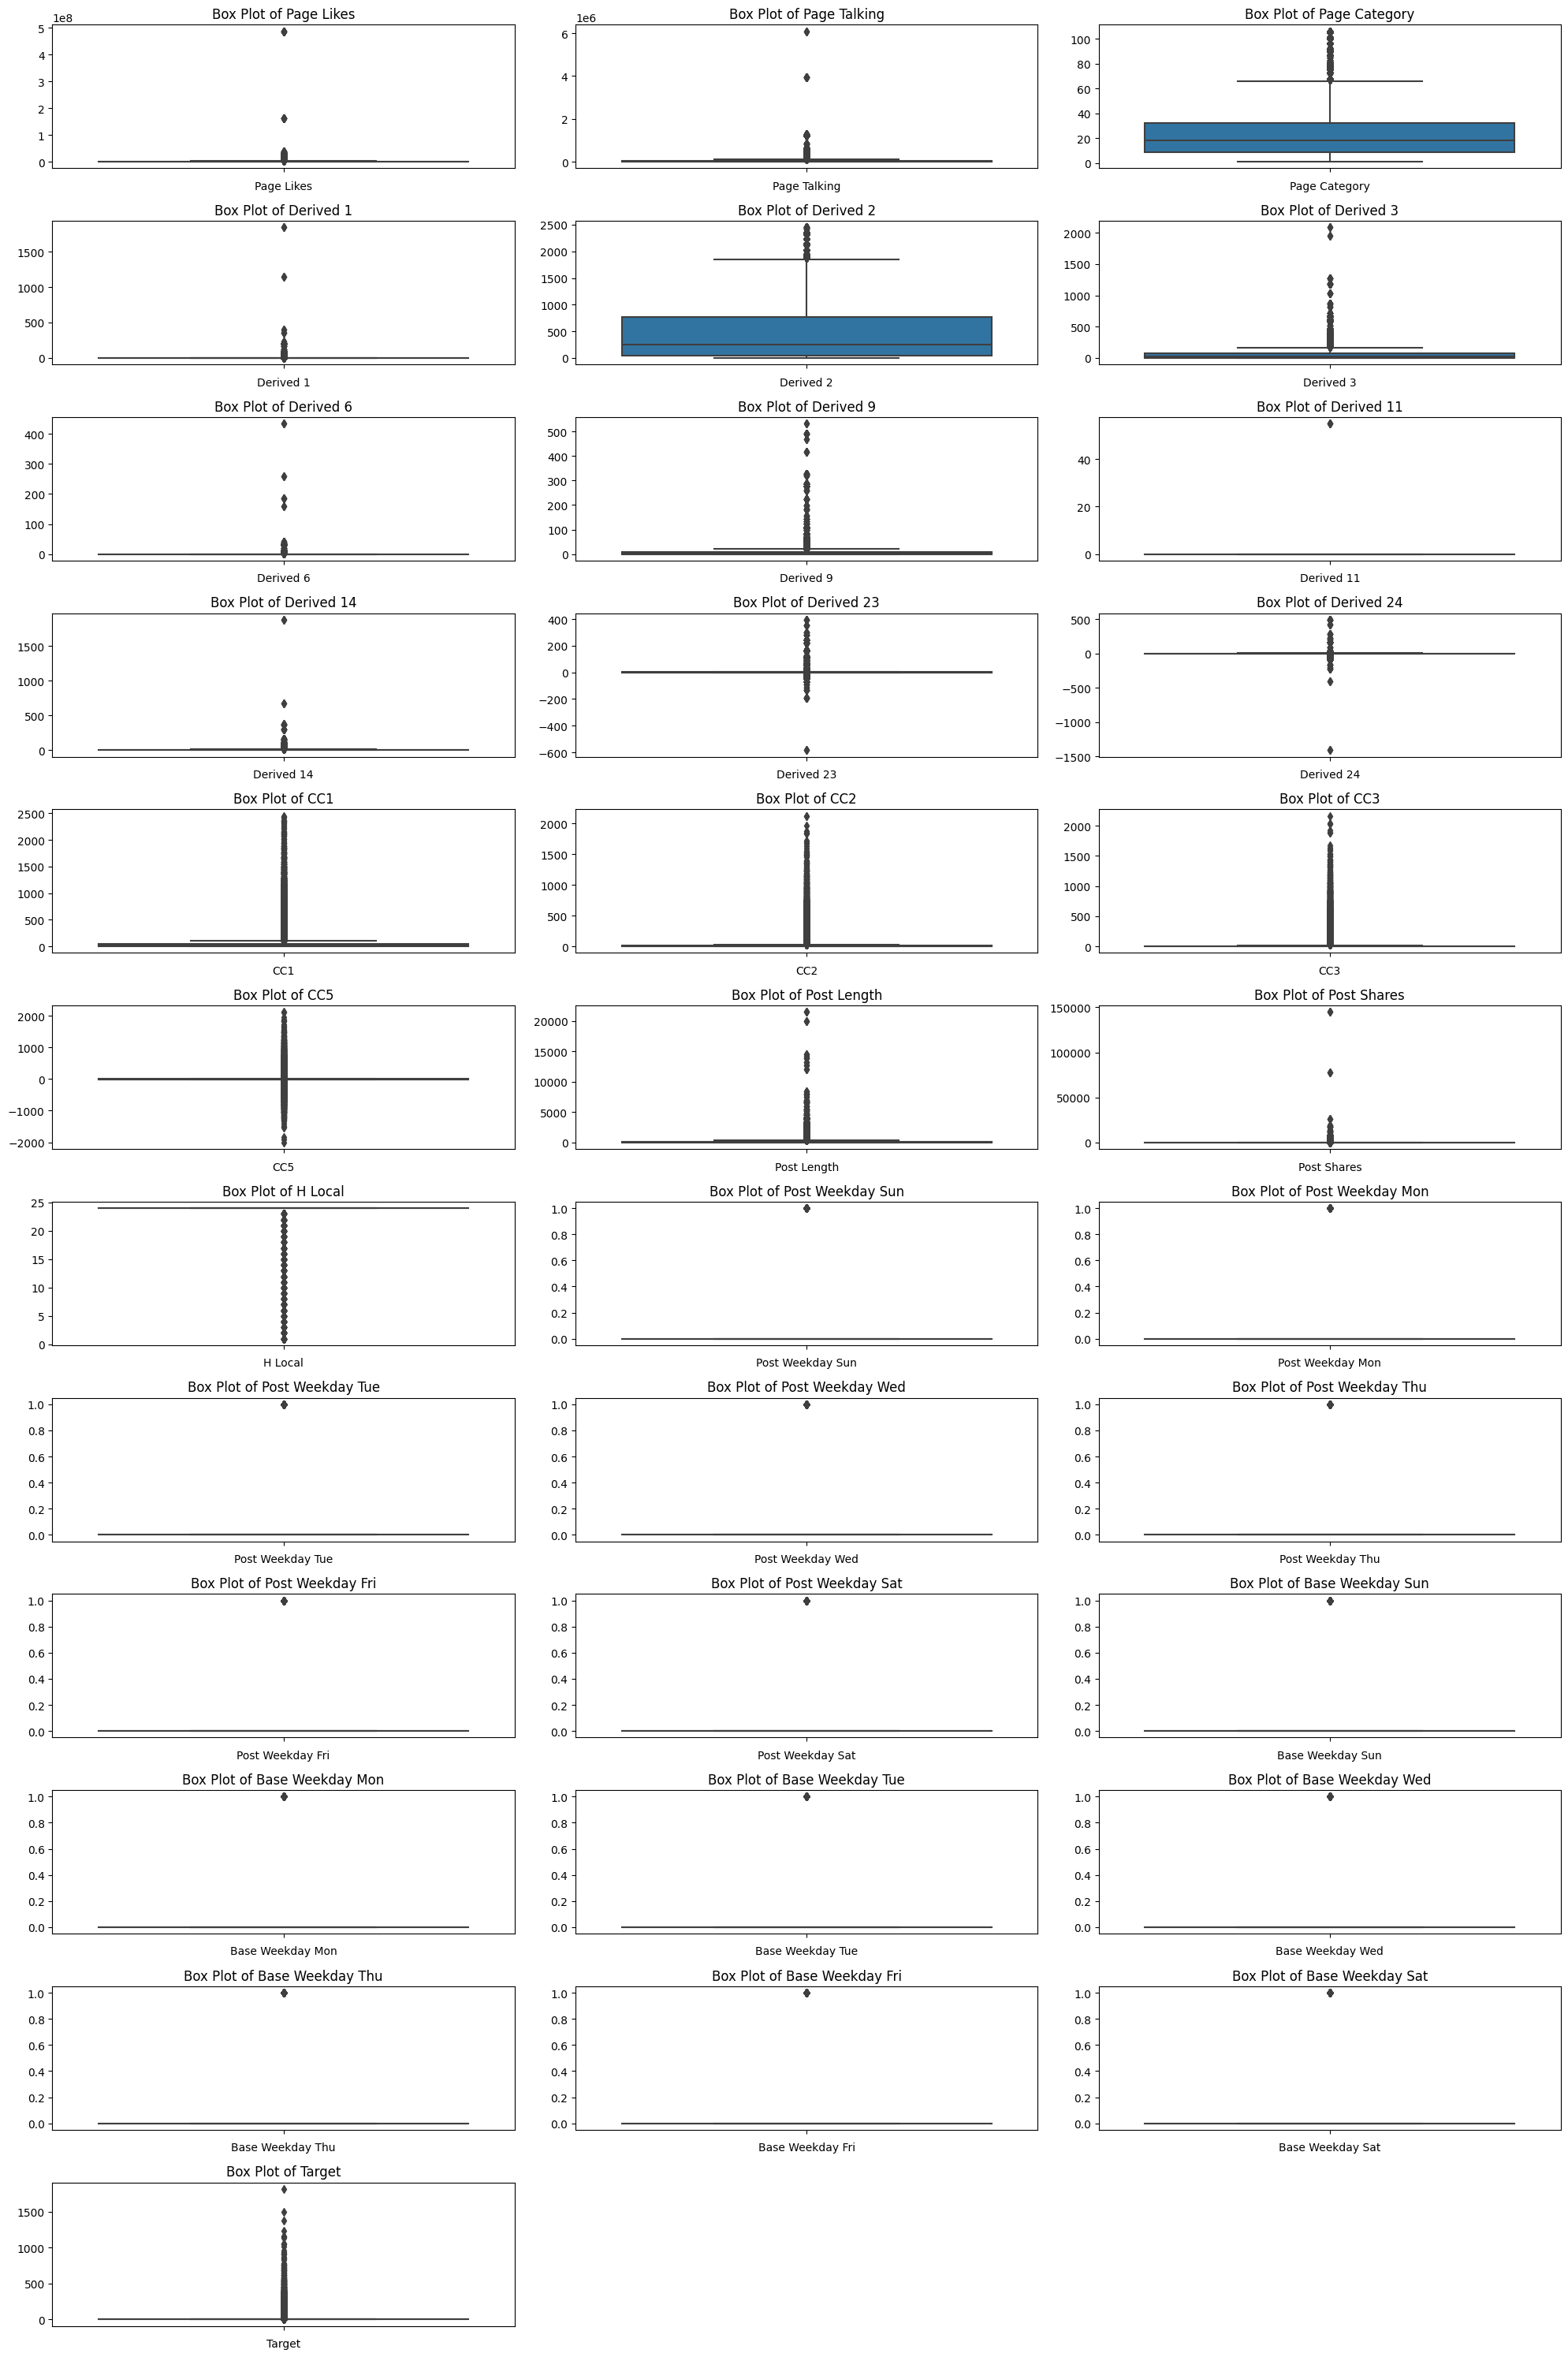

In [156]:
plt.figure(figsize=(20, 30))  
rows = len(important_columns) // 3 + 1
cols = 3

# Plot vertical box plots for numerical features in important_columns
for i, feature in enumerate(important_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel('')  
    plt.xlabel(feature)  
    plt.tight_layout()

plt.show()


**Conclusion:**

Our exploration of box plots across the selected features has revealed several important observations. Firstly, many features exhibit outliers that extend beyond the whiskers, indicating potential anomalies or extreme values within those distributions. Additionally, for some features, the median line aligns closely with the zero mark, suggesting that the data may be centered around lower values or possibly zero-inflated.

Moving forward, we recognize the significance of addressing these outliers and skewed distributions as part of our data preprocessing efforts. Outliers can significantly impact model performance and skew statistical measures, such as means and medians, leading to biased predictions. By identifying and understanding these anomalies through box plots, we are better equipped to implement appropriate techniques, such as outlier detection and treatment strategies, to enhance the robustness and reliability of our predictive models.

Moreover, this analysis underscores the importance of visual exploratory data analysis (EDA) in identifying data quality issues early on. It has provided us with actionable insights into the distributional characteristics of our features, guiding us towards informed decisions for subsequent stages of feature engineering and model development. By addressing these findings proactively, we aim to optimize model performance and ensure the accuracy and reliability of our predictions.

### Histograms of Numerical Features

We created histograms for each numerical feature in `important_columns` to visualize the distribution of their values. Here's why this visualization was important:

1. **Purpose:**
   - **Distribution Visualization:** Histograms provided a visual representation of the frequency distribution of numerical data for each feature.
   - **Understanding Data Spread:** We used histograms to understand the range and spread of values within each feature, helping us identify potential data skewness, outliers, or multimodal distributions.
   - **Initial Data Exploration:** Histograms allowed us to quickly assess the general shape and characteristics of the data distributions across multiple features.

2. **Importance:**
   - **Data Exploration:** Histograms were a fundamental tool for exploring the distributional properties of numerical features, which was crucial for initial data analysis and understanding the dataset's composition.
   - **Feature Insights:** Visual inspection of histograms provided insights into the data's central tendency, variability, and any potential data quality issues that might require further investigation.
 

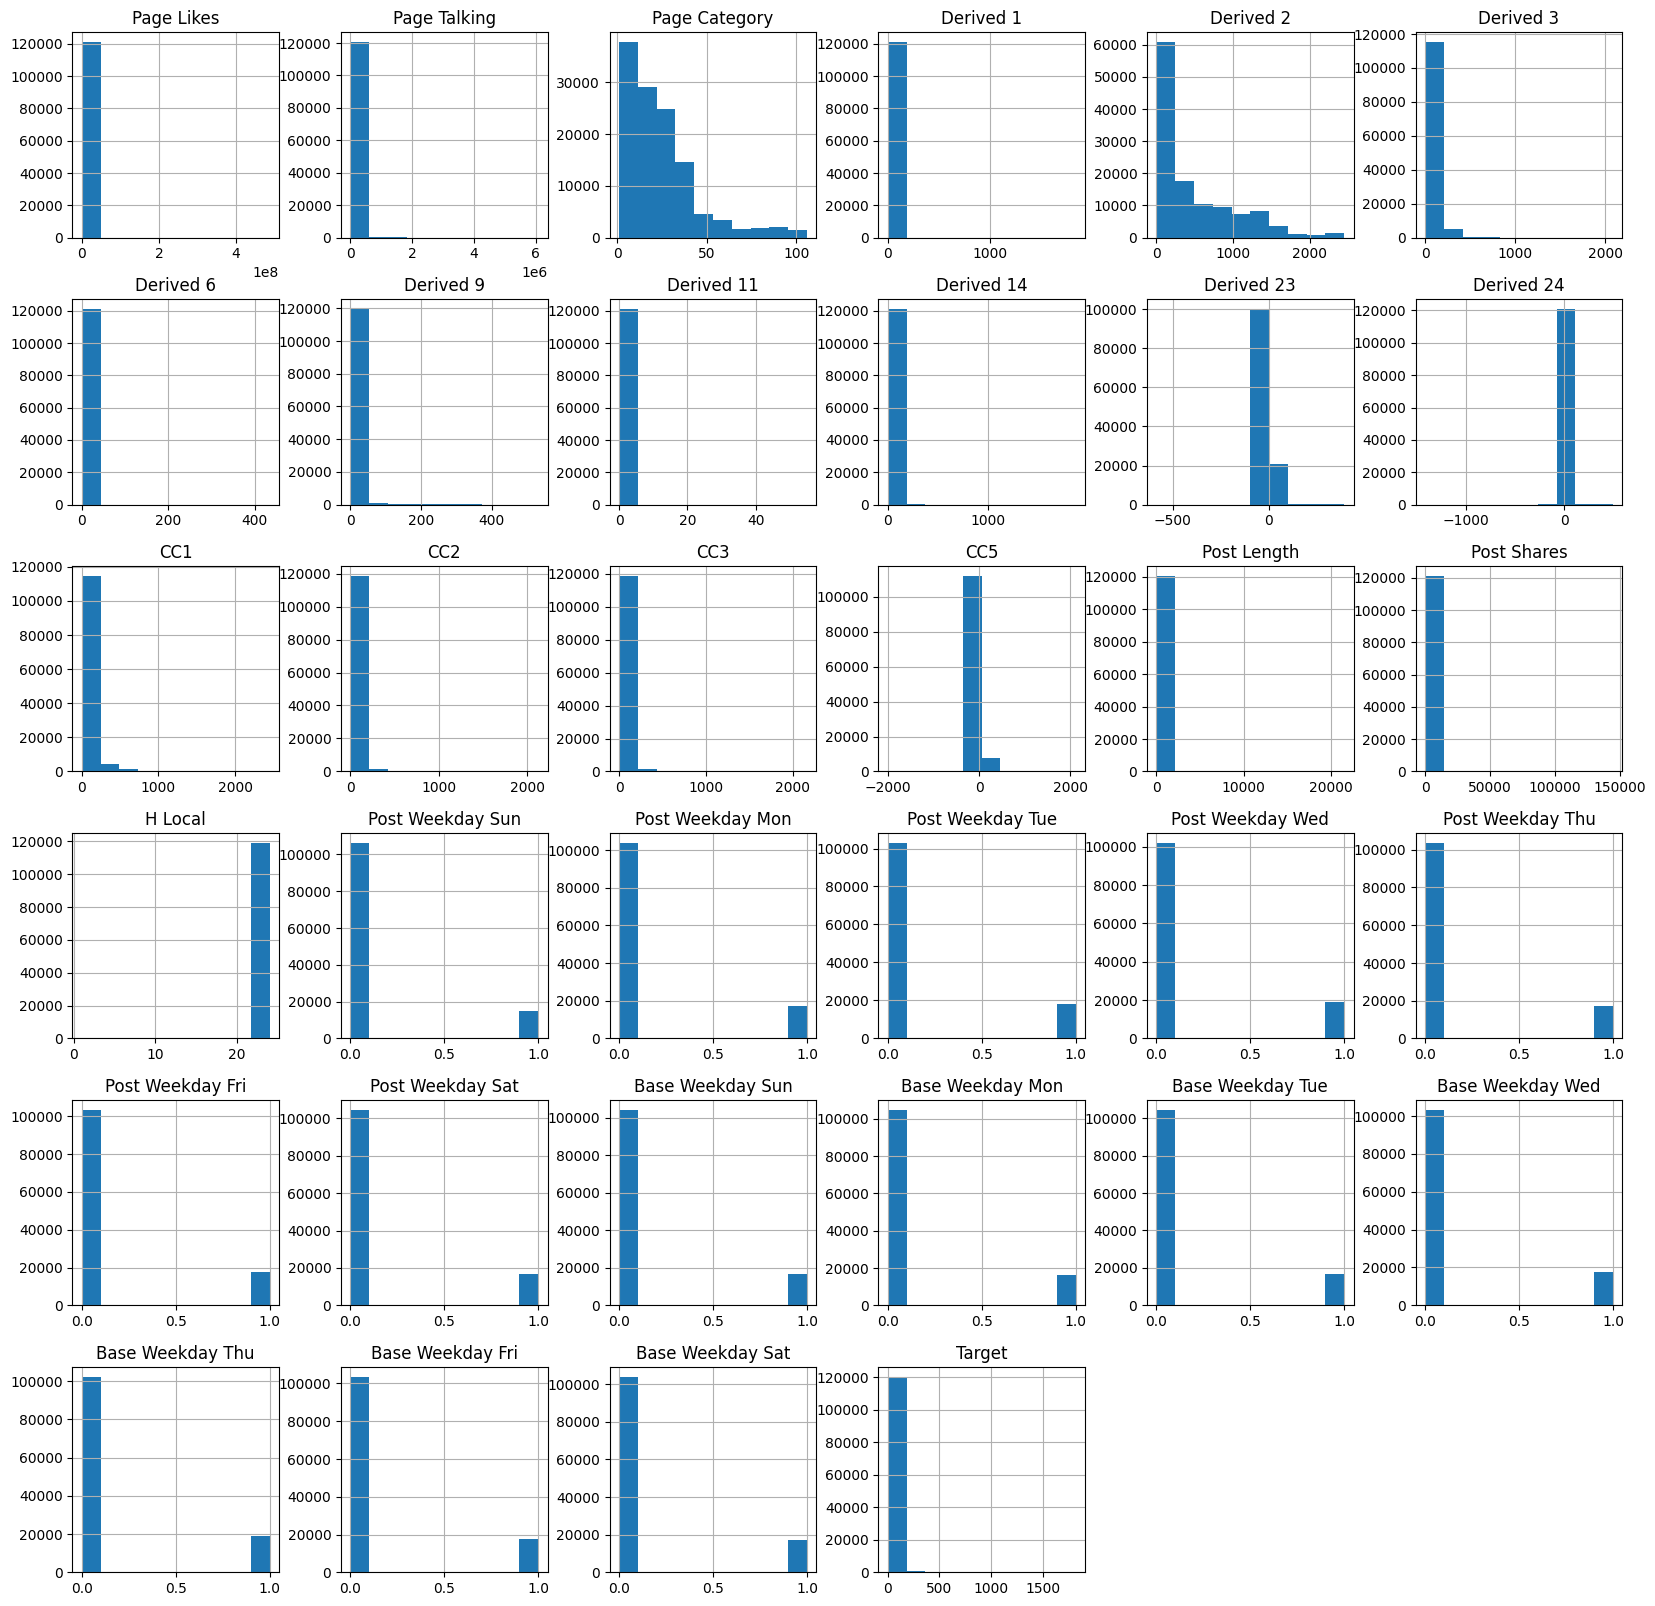

In [157]:
df[important_columns].hist(figsize=(20,20))
plt.show()

**Observation and Explanation:**

1. **Distribution Visualization:** Histograms provided clear representations of how data points were distributed across the numerical range of each feature. By examining the shape of these distributions, we could assess whether the data followed a normal distribution, exhibited skewness, or had multiple peaks indicating multimodality.

2. **Data Spread Assessment:** The histograms helped us gauge the spread and range of values present in each feature. This was crucial for identifying potential outliers or unusual data patterns that might impact the robustness of our models.

3. **Initial Data Exploration:** They facilitated a quick initial exploration of our dataset, offering insights into the overall characteristics and variability of the numerical features. This exploration was foundational for formulating hypotheses and guiding further detailed analyses.

**Conclusion:**

In conclusion, the histograms were invaluable tools in our data exploration journey. They enabled us to gain a comprehensive understanding of the distributional properties of our numerical features, guiding preprocessing decisions and enhancing our ability to identify and address potential data challenges. Moving forward, we will leverage these insights to inform our feature engineering strategies and refine our predictive models effectively.

### Calculating and Visualizing Correlation Heatmap

Calculating the correlation matrix and visualizing it as a heatmap is a crucial step in our exploratory data analysis and feature selection process. Here's why it's important:

1. **Purpose:**
   - **Understanding Relationships:** The correlation matrix shows how each pair of features in our dataset are correlated with each other. A correlation close to +1 indicates a strong positive relationship, while a correlation close to -1 indicates a strong negative relationship. A correlation near 0 suggests no linear relationship.
   - **Identifying Redundancy:** High correlations (either positive or negative) between pairs of features indicate redundancy. Redundant features provide similar information, which can lead to multicollinearity issues in predictive modeling.

2. **Importance:**
   - **Feature Selection:** By examining the correlation heatmap, we can identify pairs of features that are highly correlated. Removing one feature from highly correlated pairs can reduce redundancy and improve our model performance.
   - **Model Building:** Correlation analysis helps in selecting a subset of features that are less correlated with each other but still informative for predicting the target variable. This can lead to simpler and more interpretable models.
   - **Data Preprocessing:** Understanding correlations helps in preprocessing our data by removing or transforming features that may not add significant information or may introduce multicollinearity.

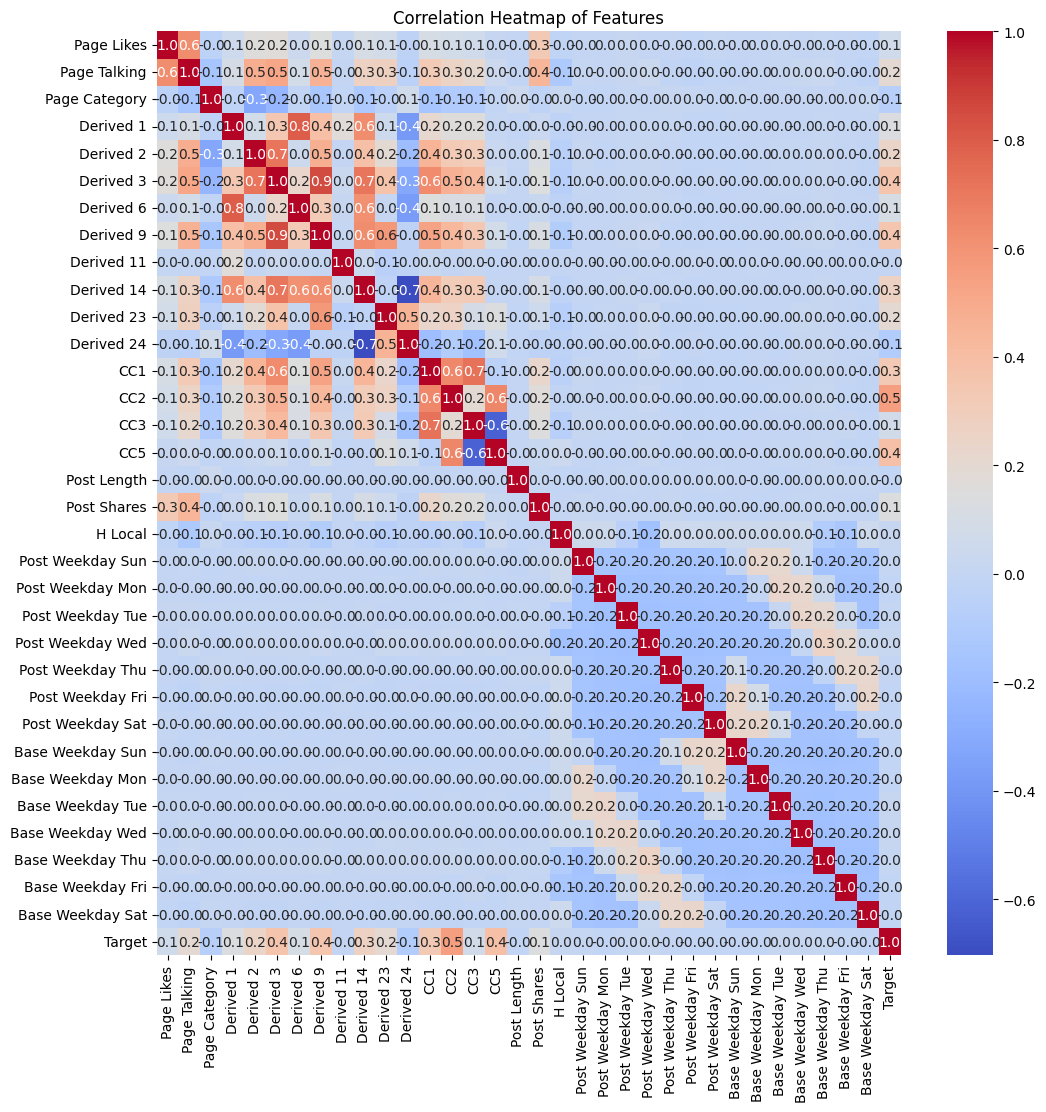

In [158]:
# Calculate correlation matrix
corr_matrix = df[important_columns].corr()

# Set up the figure size and create a single figure
plt.figure(figsize=(12, 12))

# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.1f', cbar=True)
plt.title('Correlation Heatmap of Features')

# Display the heatmap
plt.show()


**Obsevations and conclusions from the correlation heatmap:**

After addressing collinearity by removing one of the correlated columns, our analysis revealed a significant reduction in correlations close to zero among features, indicating a clearer relationship between features themselves. Furthermore, most features showed improved correlation with the target column, suggesting a stronger predictive power for our model. Despite these improvements, we identified certain features with minimal correlation to the target, which aligns with our domain knowledge. Recognizing these features' potential impact on our model's performance, we plan to focus on feature engineering strategies tailored to enhance their relevance and contribution to predicting the target variable effectively. Through careful consideration and application of domain-specific insights, we aim to refine our feature set, ultimately improving the accuracy and reliability of our predictive models.

### Visualizations to Explore Relationships

### Scatter and Line Plots of Features against Target

We created scatter and line plots to visualize the relationship between each feature in `important_columns` and the target variable ('Target'). Here's why this visualization was important:

1. **Purpose:**
   - **Relationship Exploration:** Scatter and line plots  allowed us to visually inspect the relationship and potential patterns between each feature and the target variable.
   - **Identification of Trends:** We used scatter and line plots to identify any linear or nonlinear trends between features and the target, which provided insights into how each feature might influence the target variable.
   - **Outlier Detection:** Visual examination of scatter plots helped us identify outliers or anomalies in the data points that deviated significantly from the general trend.

2. **Importance:**
   - **Feature Importance:** Insights gained from scatter and line plots assisted in understanding which features exhibited a strong or weak relationship with the target variable, guiding feature selection and engineering efforts.
   - **Model Selection:** Understanding the relationship between features and the target variable helped in selecting appropriate machine learning models that could effectively capture the underlying patterns.
   - **Data Validation:** Scatter and line plots provided a means to validate assumptions about feature importance and their impact on the target variable, contributing to the overall data analysis process.

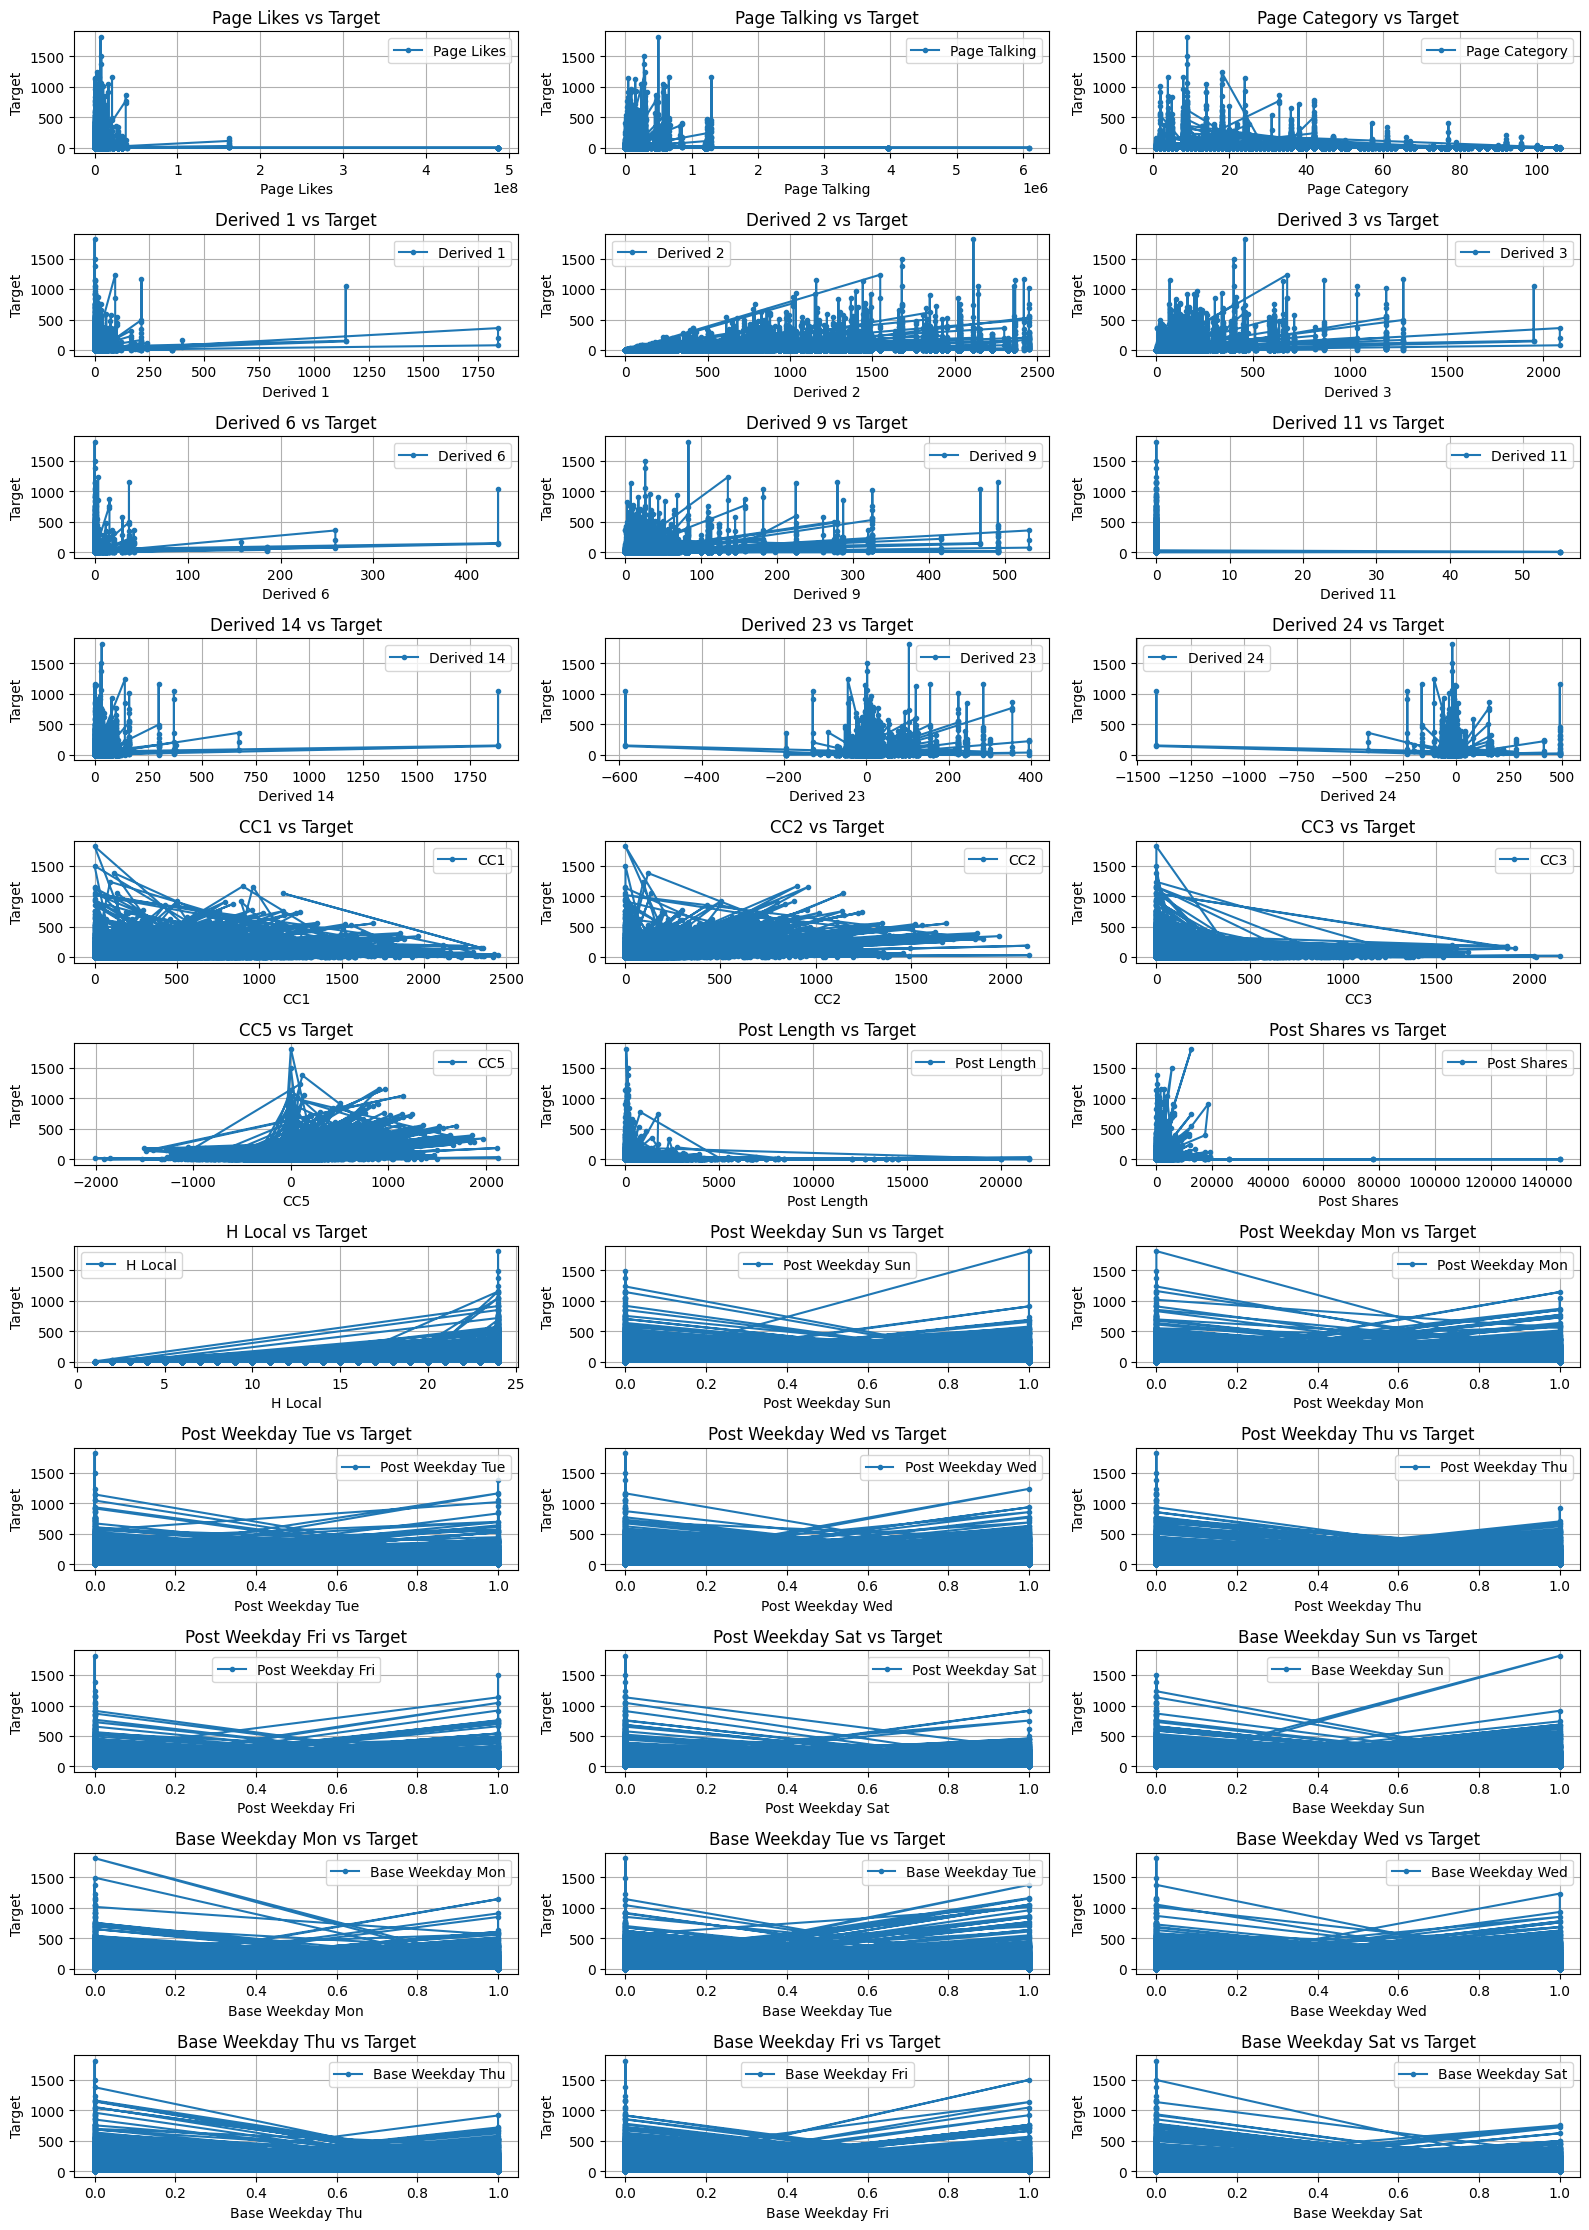

In [159]:
# Set up the figure size
plt.figure(figsize=(16, 24))  # Adjust the figure size as needed

# Plot each feature against the Target on separate subplots
for i, feature in enumerate(important_columns):
    if feature != 'Target':  # Skip the target column itself
        plt.subplot(len(important_columns) // 3 + 1, 3, i + 1)
        plt.plot(df[feature], df['Target'], marker='o', linestyle='-', markersize=3, label=feature)
        plt.xlabel(feature)
        plt.ylabel('Target')
        plt.title(f'{feature} vs Target')
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()

#### Scatter Plots (Feature vs Target)

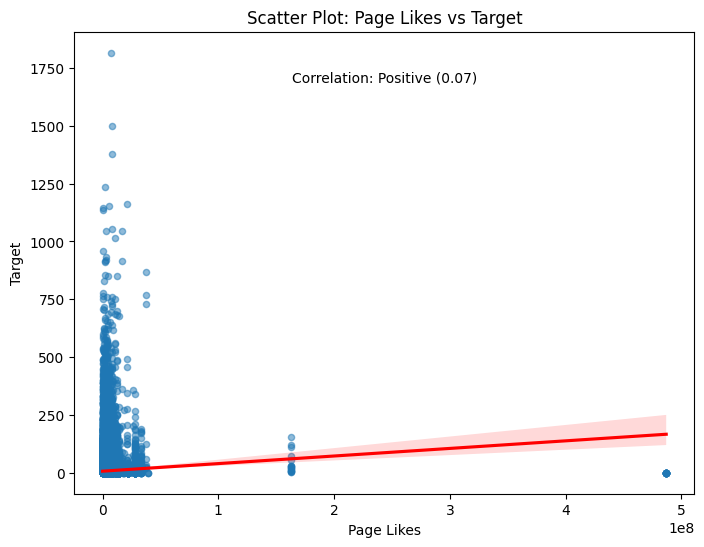

In [160]:
# Scatter plot with regression line and correlation annotation
plt.figure(figsize=(8, 6))
sns.regplot(x='Page Likes', y='Target', data=df, scatter_kws={'s': 20, 'alpha': 0.5},line_kws={'color': 'red'})
plt.title('Scatter Plot: Page Likes vs Target')

# Calculate correlation coefficient
corr_coeff = df['Page Likes'].corr(df['Target'])

# Adding correlation statement
if corr_coeff > 0:
    plt.text(0.5, 0.9, f'Correlation: Positive ({corr_coeff:.2f})', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
else:
    plt.text(0.5, 0.9, f'Correlation: Negative ({corr_coeff:.2f})', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()


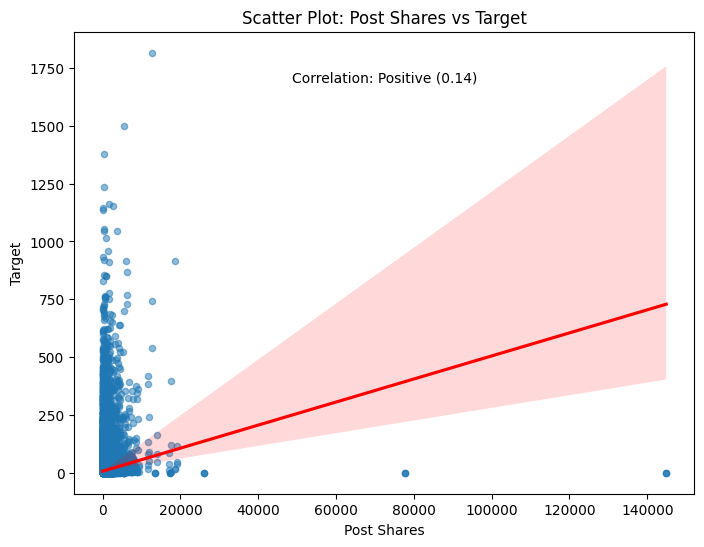

In [161]:
# Scatter plot with regression line and correlation annotation
plt.figure(figsize=(8, 6))
sns.regplot(x='Post Shares', y='Target', data=df, scatter_kws={'s': 20, 'alpha': 0.5},line_kws={'color': 'red'})
plt.title('Scatter Plot: Post Shares vs Target')

# Calculate correlation coefficient
corr_coeff = df['Post Shares'].corr(df['Target'])

# Adding correlation statement
if corr_coeff > 0:
    plt.text(0.5, 0.9, f'Correlation: Positive ({corr_coeff:.2f})', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
else:
    plt.text(0.5, 0.9, f'Correlation: Negative ({corr_coeff:.2f})', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()


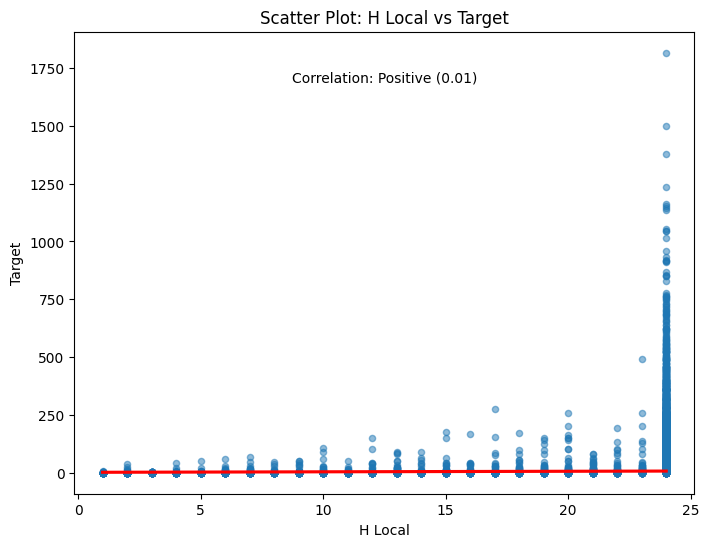

In [162]:
# Scatter plot with regression line and correlation annotation
plt.figure(figsize=(8, 6))
sns.regplot(x='H Local', y='Target', data=df, scatter_kws={'s': 20, 'alpha': 0.5},line_kws={'color': 'red'})
plt.title('Scatter Plot: H Local vs Target')

# Calculate correlation coefficient
corr_coeff = df['H Local'].corr(df['Target'])

# Adding correlation statement
if corr_coeff > 0:
    plt.text(0.5, 0.9, f'Correlation: Positive ({corr_coeff:.2f})', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
else:
    plt.text(0.5, 0.9, f'Correlation: Negative ({corr_coeff:.2f})', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()


/tmp/ipykernel_33/3916751287.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


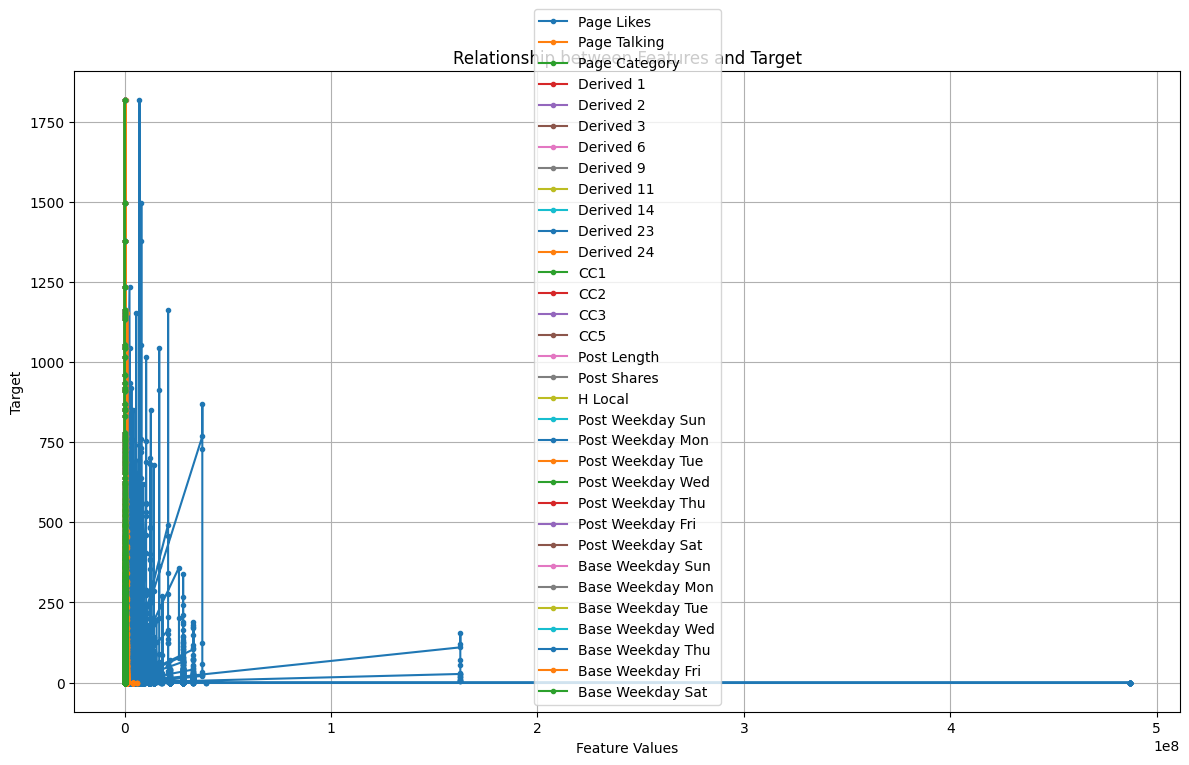

In [163]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Plot each feature against the Target on the same graph
for feature in important_columns:
    if feature != 'Target':  # Skip the target column itself
        plt.plot(df[feature], df['Target'], marker='o', linestyle='-', markersize=3, label=feature)

# Add labels and title
plt.xlabel('Feature Values')
plt.ylabel('Target')
plt.title('Relationship between Features and Target')
plt.legend()
plt.grid(True) 
plt.tight_layout()

# Show the plot
plt.show()

#### Pair Plot (for Feature vs Feature)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

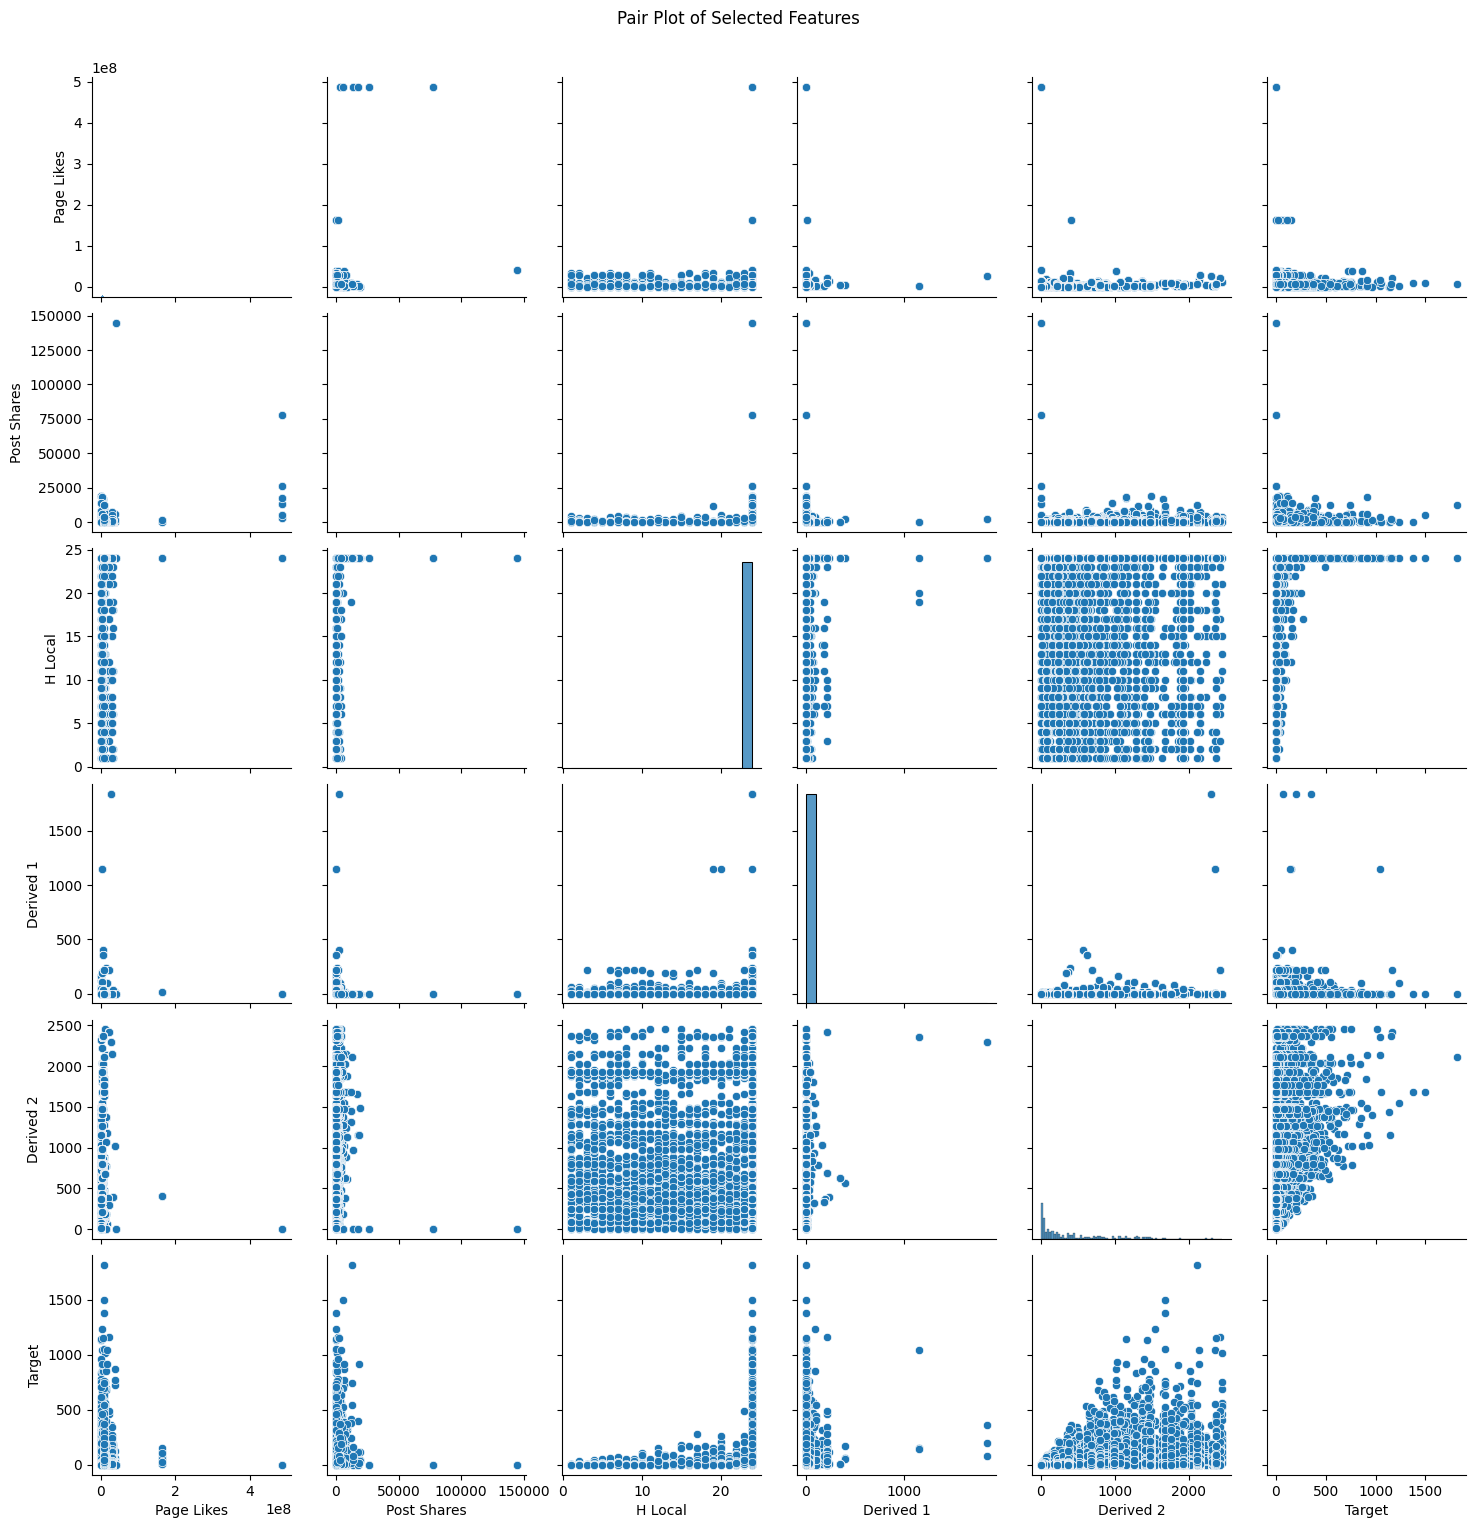

In [164]:
# Select subset of features for pair plot
features_for_pairplot = ['Page Likes', 'Post Shares', 'H Local', 'Derived 1', 'Derived 2', 'Target']

# Pair plot
sns.pairplot(df[features_for_pairplot])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


**Conclusion from line and scatter plot :**
Based on our exploration of the dataset, we have identified and visualized key features that show varied correlations with the target variable. While some important features exhibit low correlation, our understanding from domain knowledge and preliminary analysis suggests their significance in predictive modeling. Moving forward, we will proceed to build and evaluate machine learning models, leveraging advanced techniques such as feature engineering harness the predictive potential of these features effectively. 

In [165]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Removing outliers based on the IQR method
Q1 = df[important_columns].quantile(0.25)
Q3 = df[important_columns].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[important_columns] < (Q1 - 1.5 * IQR)) |(df[important_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


NameError: name 'y_test' is not defined